# Context
Phase three of this project is data cleanup and dimensionality reduction.\
This notebook drives this process for the data that went through the
transformations in PH2.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../project.env")
sys.path.append(os.environ["PYTHONPATH"])

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import PH3header as ph3

Directory /Users/diego/Desktop/iteso/TOG/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/src exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH1/two-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH2/two-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/clean exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/red exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/clean/w2 exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/two-classes/clean/wo2 exists. Continuing 

# Source dataframe loading

In [3]:
import pandas as pd

## Per frame / Active hand

In [4]:
PH1_active_df = pd.read_csv(sup.PH1_DATA_ACTIVE_CSV)
PH1_active_df

,person_id,cycle_num,handedness,class_name,class_numeric,fileid,current_frame,h0x,h0y,h0z,...,p0x,p0y,p0z,p11x,p11y,p11z,p12x,p12y,p12z,active_hand
0,p01,1,0,a,0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,0,0.356595,0.485021,-1.312914e-07,...,0.509847,0.324974,-0.511315,0.582418,0.521928,-0.164979,0.419079,0.505322,-0.183779,1
1,p01,1,0,a,0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,0,0.567594,0.906298,4.943682e-09,...,0.509847,0.324974,-0.511315,0.582418,0.521928,-0.164979,0.419079,0.505322,-0.183779,0
2,p01,1,0,a,0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,1,0.352816,0.484037,-1.180915e-07,...,0.513431,0.326082,-0.519151,0.579848,0.519345,-0.151877,0.419200,0.498523,-0.208451,1
3,p01,1,0,a,0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,1,0.567833,0.905873,4.337321e-09,...,0.513431,0.326082,-0.519151,0.579848,0.519345,-0.151877,0.419200,0.498523,-0.208451,0
4,p01,1,0,a,0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,2,0.351332,0.480660,-1.254345e-07,...,0.511904,0.326614,-0.538389,0.582581,0.522652,-0.176160,0.420109,0.498809,-0.215022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,p11,5,1,b,1,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4,9,0.405674,0.764709,5.895547e-08,...,0.485571,0.225081,-0.449431,0.574521,0.399775,-0.116570,0.403689,0.412528,-0.128586,0
5002,p11,5,1,b,1,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4,10,0.633578,0.386601,-1.037258e-07,...,0.484376,0.228379,-0.438624,0.573325,0.403236,-0.096671,0.400964,0.415107,-0.109301,1
5003,p11,5,1,b,1,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4,10,0.404680,0.765115,4.365882e-08,...,0.484376,0.228379,-0.438624,0.573325,0.403236,-0.096671,0.400964,0.415107,-0.109301,0
5004,p11,5,1,b,1,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_b.mp4,11,0.633556,0.386977,-1.034930e-07,...,0.482275,0.226709,-0.417354,0.574424,0.403286,-0.096126,0.401220,0.413737,-0.091982,1


## Per video

In [5]:
PH1_video_df = pd.read_csv(sup.PH1_DATA_PERVIDEO_CSV)
PH1_video_df

,person_id,cycle_num,handedness,class_name,class_numeric,f0_h0x,f0_h0y,f0_h0z,f0_h1x,f0_h1y,...,f11_h20z,f11_p0x,f11_p0y,f11_p0z,f11_p11x,f11_p11y,f11_p11z,f11_p12x,f11_p12y,f11_p12z
0,p01,1,0,a,0,0.356595,0.485021,-1.312914e-07,0.373518,0.459913,...,0.000712,0.513618,0.329477,-0.509254,0.587519,0.527019,-0.149709,0.425322,0.497731,-0.168903
1,p01,1,0,b,1,0.348771,0.466237,4.743118e-08,0.363611,0.446080,...,-0.009232,0.513528,0.320183,-0.516217,0.585881,0.525961,-0.175390,0.422400,0.499646,-0.196429
2,p01,1,1,a,0,0.475774,0.927311,-9.812992e-08,0.494941,0.935337,...,-0.005570,0.489232,0.332752,-0.768854,0.573585,0.491954,-0.368677,0.400048,0.538888,-0.429950
3,p01,1,1,b,1,0.673130,0.452971,-6.348814e-09,0.662367,0.436210,...,0.004865,0.477038,0.329535,-0.724772,0.572456,0.499061,-0.355822,0.396333,0.538750,-0.390981
4,p01,2,0,a,0,0.356703,0.455645,-1.280792e-07,0.373605,0.434001,...,-0.001645,0.505790,0.328168,-0.510567,0.585073,0.526921,-0.162060,0.420092,0.496173,-0.172387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,p11,4,1,b,1,0.645514,0.291388,-1.497878e-07,0.628773,0.270614,...,-0.004285,0.497029,0.178938,-0.321385,0.578110,0.349044,-0.055098,0.406686,0.370372,-0.046639
209,p11,5,0,a,0,0.352055,0.521995,-5.147281e-08,0.371064,0.510372,...,-0.011197,0.476834,0.193496,-0.210986,0.574185,0.363997,0.093915,0.400514,0.367275,0.079185
210,p11,5,0,b,1,0.365258,0.335842,-5.006000e-08,0.385060,0.323807,...,-0.015492,0.484834,0.194117,-0.179015,0.579442,0.370878,0.104476,0.407891,0.372225,0.081452
211,p11,5,1,a,0,0.644268,0.334418,-1.884289e-07,0.624991,0.314313,...,-0.001607,0.484898,0.196024,-0.487740,0.579202,0.366986,-0.131724,0.406939,0.388264,-0.146042


# Cleanup

## Drop unnecessary columns

### Active Hand

In [6]:
pf_dataCols = sup.pf_hand_landmark_columns+sup.pf_pose_landmark_columns

In [7]:
PH1_AH_clean_df = PH1_active_df[[sup.active_hand_col]+pf_dataCols]
PH1_AH_clean_df

,active_hand,h0x,h0y,h0z,h1x,h1y,h1z,h2x,h2y,h2z,...,h20z,p0x,p0y,p0z,p11x,p11y,p11z,p12x,p12y,p12z
0,1,0.356595,0.485021,-1.312914e-07,0.373518,0.459913,-0.003802,0.382574,0.427299,-0.005120,...,-0.002761,0.509847,0.324974,-0.511315,0.582418,0.521928,-0.164979,0.419079,0.505322,-0.183779
1,0,0.567594,0.906298,4.943682e-09,0.547834,0.921491,-0.002715,0.536150,0.951478,-0.004419,...,-0.011593,0.509847,0.324974,-0.511315,0.582418,0.521928,-0.164979,0.419079,0.505322,-0.183779
2,1,0.352816,0.484037,-1.180915e-07,0.371313,0.459922,-0.003602,0.381156,0.427376,-0.004734,...,-0.002850,0.513431,0.326082,-0.519151,0.579848,0.519345,-0.151877,0.419200,0.498523,-0.208451
3,0,0.567833,0.905873,4.337321e-09,0.548048,0.921183,-0.002559,0.536497,0.951170,-0.004229,...,-0.011505,0.513431,0.326082,-0.519151,0.579848,0.519345,-0.151877,0.419200,0.498523,-0.208451
4,1,0.351332,0.480660,-1.254345e-07,0.370044,0.457751,-0.003379,0.380355,0.425711,-0.004444,...,-0.003898,0.511904,0.326614,-0.538389,0.582581,0.522652,-0.176160,0.420109,0.498809,-0.215022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,0,0.405674,0.764709,5.895547e-08,0.425558,0.766119,-0.006012,0.443012,0.783180,-0.014492,...,-0.025703,0.485571,0.225081,-0.449431,0.574521,0.399775,-0.116570,0.403689,0.412528,-0.128586
5002,1,0.633578,0.386601,-1.037258e-07,0.622075,0.367016,-0.008620,0.615695,0.336702,-0.012277,...,-0.012498,0.484376,0.228379,-0.438624,0.573325,0.403236,-0.096671,0.400964,0.415107,-0.109301
5003,0,0.404680,0.765115,4.365882e-08,0.424475,0.764827,-0.005375,0.442553,0.783184,-0.012920,...,-0.025550,0.484376,0.228379,-0.438624,0.573325,0.403236,-0.096671,0.400964,0.415107,-0.109301
5004,1,0.633556,0.386977,-1.034930e-07,0.622492,0.367370,-0.008902,0.616215,0.336357,-0.012468,...,-0.012187,0.482275,0.226709,-0.417354,0.574424,0.403286,-0.096126,0.401220,0.413737,-0.091982


### Per video

In [8]:
pv_dataCols = sup.pv_hand_landmark_columns+sup.pv_pose_landmark_columns

In [9]:
PH1_VID_clean_df = PH1_video_df[[sup.class_numeric_column]+pv_dataCols]
PH1_VID_clean_df

,class_numeric,f0_h0x,f0_h0y,f0_h0z,f0_h1x,f0_h1y,f0_h1z,f0_h2x,f0_h2y,f0_h2z,...,f10_p12z,f11_p0x,f11_p0y,f11_p0z,f11_p11x,f11_p11y,f11_p11z,f11_p12x,f11_p12y,f11_p12z
0,0,0.356595,0.485021,-1.312914e-07,0.373518,0.459913,-0.003802,0.382574,0.427299,-0.005120,...,-0.181216,0.513618,0.329477,-0.509254,0.587519,0.527019,-0.149709,0.425322,0.497731,-0.168903
1,1,0.348771,0.466237,4.743118e-08,0.363611,0.446080,-0.004794,0.369070,0.412776,-0.004948,...,-0.174964,0.513528,0.320183,-0.516217,0.585881,0.525961,-0.175390,0.422400,0.499646,-0.196429
2,0,0.475774,0.927311,-9.812992e-08,0.494941,0.935337,0.002976,0.506056,0.958528,0.002645,...,-0.453234,0.489232,0.332752,-0.768854,0.573585,0.491954,-0.368677,0.400048,0.538888,-0.429950
3,1,0.673130,0.452971,-6.348814e-09,0.662367,0.436210,-0.011240,0.654491,0.409298,-0.016136,...,-0.407527,0.477038,0.329535,-0.724772,0.572456,0.499061,-0.355822,0.396333,0.538750,-0.390981
4,0,0.356703,0.455645,-1.280792e-07,0.373605,0.434001,-0.003840,0.384985,0.405219,-0.005079,...,-0.191310,0.505790,0.328168,-0.510567,0.585073,0.526921,-0.162060,0.420092,0.496173,-0.172387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,1,0.645514,0.291388,-1.497878e-07,0.628773,0.270614,-0.006013,0.614850,0.243209,-0.009983,...,-0.060309,0.497029,0.178938,-0.321385,0.578110,0.349044,-0.055098,0.406686,0.370372,-0.046639
209,0,0.352055,0.521995,-5.147281e-08,0.371064,0.510372,-0.007648,0.383717,0.493164,-0.013917,...,0.051888,0.476834,0.193496,-0.210986,0.574185,0.363997,0.093915,0.400514,0.367275,0.079185
210,1,0.365258,0.335842,-5.006000e-08,0.385060,0.323807,-0.006881,0.399298,0.302045,-0.009769,...,0.116572,0.484834,0.194117,-0.179015,0.579442,0.370878,0.104476,0.407891,0.372225,0.081452
211,0,0.644268,0.334418,-1.884289e-07,0.624991,0.314313,-0.005429,0.611459,0.286023,-0.008327,...,-0.124706,0.484898,0.196024,-0.487740,0.579202,0.366986,-0.131724,0.406939,0.388264,-0.146042


## Standardize data

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

### Active Hand

In [11]:
PH1_AH_std_df = PH1_AH_clean_df[[sup.active_hand_col]]
PH1_AH_std_df[pf_dataCols] = scaler.fit_transform(PH1_AH_clean_df[pf_dataCols])

PH1_AH_std_df

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_42266/801345257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH1_AH_std_df[pf_dataCols] = scaler.fit_transform(PH1_AH_clean_df[pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_42266/801345257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH1_AH_std_df[pf_dataCols] = scaler.fit_transform(PH1_AH_clean_df[pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_42266/801345257.py:2: SettingWithCopyWa

,active_hand,h0x,h0y,h0z,h1x,h1y,h1z,h2x,h2y,h2z,...,h20z,p0x,p0y,p0z,p11x,p11y,p11z,p12x,p12y,p12z
0,1,-1.360371,-0.571336,-1.385326,-1.409000,-0.650392,0.633135,-1.479157,-0.726917,0.959762,...,1.397673,0.562333,1.289459,-0.371511,0.146537,1.932786,-0.018014,0.175009,1.702988,-0.189110
1,0,0.612763,1.572302,0.177694,0.499522,1.577426,0.907623,0.418362,1.555721,1.081068,...,0.703737,0.562333,1.289459,-0.371511,0.146537,1.932786,-0.018014,0.175009,1.702988,-0.189110
2,1,-1.395718,-0.576343,-1.233884,-1.433148,-0.650347,0.683695,-1.496679,-0.726580,1.026560,...,1.390647,0.699209,1.308137,-0.426191,0.061344,1.889948,0.098877,0.180396,1.578370,-0.383243
3,0,0.614999,1.570140,0.170738,0.501866,1.575940,0.946889,0.422648,1.554380,1.113986,...,0.710645,0.699209,1.308137,-0.426191,0.061344,1.889948,0.098877,0.180396,1.578370,-0.383243
4,1,-1.409590,-0.593530,-1.318130,-1.447040,-0.660826,0.739968,-1.506573,-0.733830,1.076750,...,1.308352,0.640881,1.317126,-0.560435,0.151936,1.944789,-0.117762,0.220667,1.583620,-0.434952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,0,-0.901423,0.851835,0.797370,-0.839242,0.827518,0.075529,-0.732403,0.822833,-0.662122,...,-0.404976,-0.364924,-0.395409,0.060311,-0.115190,-0.092682,0.413863,-0.506813,0.002163,0.245185
5002,1,1.229803,-1.072140,-1.069068,1.312364,-1.098764,-0.582876,1.401198,-1.121437,-0.278775,...,0.632606,-0.410554,-0.339784,0.135724,-0.154812,-0.035286,0.591383,-0.627535,0.049438,0.396934
5003,0,-0.910709,0.853903,0.621872,-0.851093,0.821283,0.236256,-0.738082,0.822853,-0.390077,...,-0.392980,-0.410554,-0.339784,0.135724,-0.154812,-0.035286,0.591383,-0.627535,0.049438,0.396934
5004,1,1.229598,-1.070231,-1.066397,1.316933,-1.097055,-0.653866,1.407612,-1.122938,-0.311796,...,0.657032,-0.490810,-0.367955,0.284146,-0.118408,-0.034456,0.596246,-0.616188,0.024324,0.533210


### Per video

In [12]:
PH1_VID_std_df = PH1_VID_clean_df[[sup.class_numeric_column]]
PH1_VID_std_df[pv_dataCols] = scaler.fit_transform(PH1_VID_clean_df[pv_dataCols])

PH1_VID_std_df

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_42266/154288461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH1_VID_std_df[pv_dataCols] = scaler.fit_transform(PH1_VID_clean_df[pv_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_42266/154288461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH1_VID_std_df[pv_dataCols] = scaler.fit_transform(PH1_VID_clean_df[pv_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_42266/154288461.py:2: SettingWithCo

,class_numeric,f0_h0x,f0_h0y,f0_h0z,f0_h1x,f0_h1y,f0_h1z,f0_h2x,f0_h2y,f0_h2z,...,f10_p12z,f11_p0x,f11_p0y,f11_p0z,f11_p11x,f11_p11y,f11_p11z,f11_p12x,f11_p12y,f11_p12z
0,0,-1.230800,0.137218,-0.976489,-1.259861,0.034389,0.786844,-1.311034,-0.066516,1.030590,...,-0.175753,0.715550,1.346851,-0.372801,0.333144,2.010518,0.121141,0.452444,1.563176,-0.072497
1,1,-1.298180,0.008626,1.008117,-1.358105,-0.055573,0.476841,-1.460509,-0.152423,1.064768,...,-0.125620,0.712143,1.188905,-0.423137,0.279193,1.992922,-0.117081,0.322969,1.598418,-0.296552
2,0,-0.204441,3.164971,-0.608251,-0.055869,3.126206,2.905811,0.055795,3.075993,2.579461,...,-2.356978,-0.209273,1.402498,-2.249496,-0.125678,1.427671,-1.909995,-0.667555,2.320797,-2.197354
3,1,1.495178,-0.082188,0.410923,1.604275,-0.119761,-1.538355,1.698834,-0.172999,-1.166926,...,-1.990473,-0.671723,1.347835,-1.930818,-0.162831,1.545804,-1.790748,-0.832171,2.318261,-1.880159
4,0,-1.229878,-0.063883,-0.940819,-1.258999,-0.134125,0.774955,-1.284345,-0.197132,1.038688,...,-0.256696,0.418672,1.324604,-0.382291,0.252588,2.008880,0.006572,0.220693,1.534495,-0.100853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,1,1.257347,-1.188323,-1.181881,1.271161,-1.196676,0.095763,1.260048,-1.155504,0.060531,...,0.793755,0.086424,-1.211264,0.985330,0.023330,-0.947776,0.998741,-0.373378,-0.781307,0.922708
209,0,-1.269900,0.390330,-0.090152,-1.284196,0.362537,-0.415362,-1.298379,0.323115,-0.724225,...,1.693432,-0.679459,-0.963881,1.783423,-0.105919,-0.699222,2.380972,-0.646895,-0.838326,1.946883
210,1,-1.156196,-0.884007,-0.074463,-1.145424,-0.850747,-0.175556,-1.125917,-0.807458,0.103288,...,2.212110,-0.376053,-0.953338,2.014548,0.067180,-0.584855,2.478932,-0.320002,-0.747196,1.965340
211,0,1.246621,-0.893757,-1.610966,1.233660,-0.912486,0.278381,1.222517,-0.902238,0.390790,...,0.277376,-0.373628,-0.920917,-0.217277,0.059289,-0.649541,0.287967,-0.362192,-0.451942,0.113586


## Write out clean and standardized data

### Active Hand

In [13]:
PH1_AH_std_df.to_csv(os.path.join(sup.PH3_DATA_CLEAN_WO2_ROOT, "active.csv"), index=False)

### Per video

In [14]:
PH1_VID_std_df.to_csv(os.path.join(sup.PH3_DATA_CLEAN_WO2_ROOT, "pervideo.csv"), index=False)

# Dimensionality Reduction

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import umap.umap_ as umap

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
def plot3d(data, labels):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Convert labels to categorical codes for coloring
    labels_cat = labels.astype('category')
    colors = labels_cat.cat.codes
    cmap = plt.cm.Spectral

    sc = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors, cmap=cmap, s=20)

    # Add legend by plotting invisible points for each category/color
    for i, category in enumerate(labels_cat.cat.categories):
        ax.scatter([], [], [], color=cmap(i / len(labels_cat.cat.categories)), label=category)
    ax.legend(title='active_hand')

    plt.show()

## Active Hand

### PCA

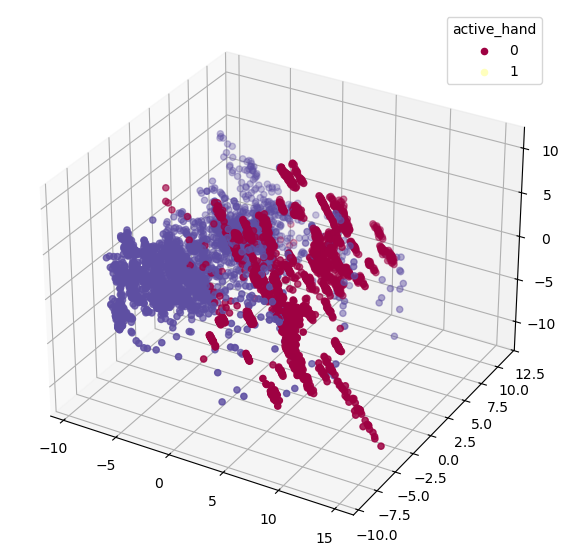

In [17]:
ah_PCA = PCA(n_components=3)
PH1_AH_PCA_df = PH1_AH_std_df.copy()

ah_pca_data = ah_PCA.fit_transform(PH1_AH_PCA_df)

ah_pca_data_df = pd.DataFrame(ah_pca_data, columns=['PCA1', 'PCA2', 'PCA3'])
ah_pca_data_df[sup.active_hand_col] = PH1_AH_PCA_df[sup.active_hand_col]

plot3d(ah_pca_data, PH1_AH_PCA_df[sup.active_hand_col])


### UMAP

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


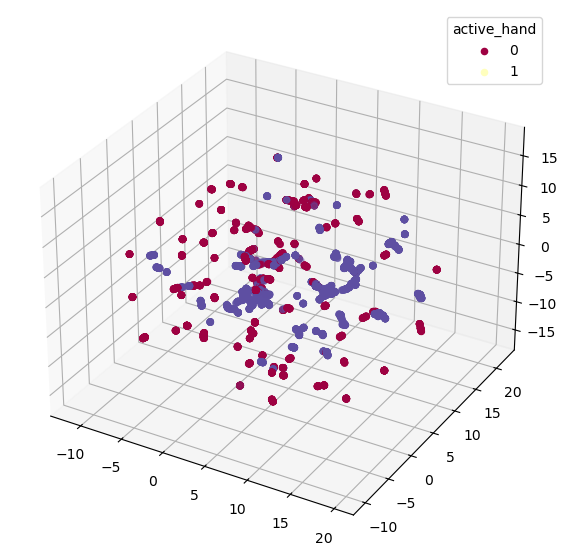

In [18]:
ah_UMAP = umap.UMAP(n_components=3, random_state=42)
PH1_AH_UMAP_df = PH1_AH_std_df.copy()

ah_umap_data = ah_UMAP.fit_transform(PH1_AH_UMAP_df)

ah_umap_data_df = pd.DataFrame(ah_umap_data, columns=['PCA1', 'PCA2', 'PCA3'])
ah_umap_data_df[sup.active_hand_col] = PH1_AH_UMAP_df[sup.active_hand_col]

plot3d(ah_umap_data, PH1_AH_UMAP_df[sup.active_hand_col])

## Per Video

### PCA

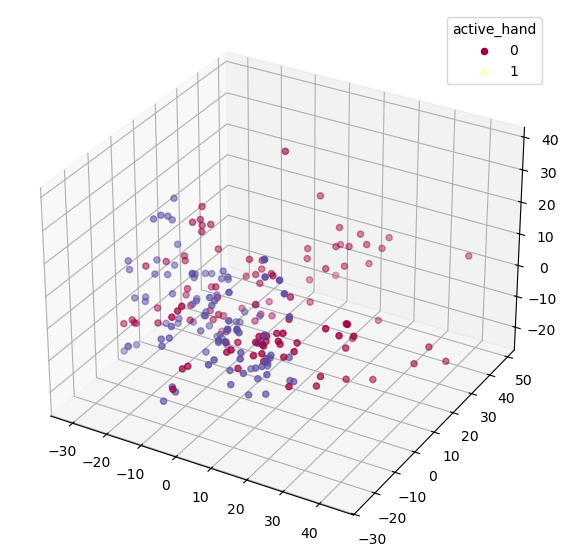

In [19]:
vid_PCA = PCA(n_components=3)
PH1_VID_PCA_df = PH1_VID_std_df.copy()

vid_pca_data = vid_PCA.fit_transform(PH1_VID_PCA_df)

vid_pca_data_df = pd.DataFrame(vid_pca_data, columns=['PCA1', 'PCA2', 'PCA3'])
vid_pca_data_df[sup.active_hand_col] = PH1_VID_PCA_df[sup.class_numeric_column]

plot3d(vid_pca_data, PH1_VID_PCA_df[sup.class_numeric_column])

### UMAP

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


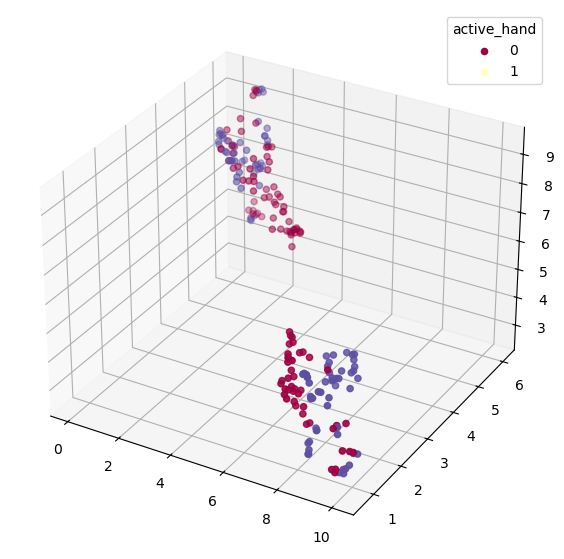

In [20]:
vid_UMAP = umap.UMAP(n_components=3, random_state=42)
PH1_VID_UMAP_df = PH1_VID_std_df.copy()

vid_umap_data = vid_UMAP.fit_transform(PH1_VID_UMAP_df)

vid_umap_data_df = pd.DataFrame(vid_umap_data, columns=['PCA1', 'PCA2', 'PCA3'])
vid_umap_data_df[sup.active_hand_col] = PH1_VID_UMAP_df[sup.class_numeric_column]

plot3d(vid_umap_data, PH1_VID_UMAP_df[sup.class_numeric_column])

## Write out data after dimensionality reduction

### Active Hand

In [21]:
ah_pca_data_df.to_csv(os.path.join(sup.PH3_DATA_RED_WO2_ROOT, "pca_active.csv"), index=False)
ah_umap_data_df.to_csv(os.path.join(sup.PH3_DATA_RED_WO2_ROOT, "umap_active.csv"), index=False)

### Per video

In [22]:
vid_pca_data_df.to_csv(os.path.join(sup.PH3_DATA_RED_WO2_ROOT, "pca_pervideo.csv"), index=False)
vid_umap_data_df.to_csv(os.path.join(sup.PH3_DATA_RED_WO2_ROOT, "umap_pervideo.csv"), index=False)